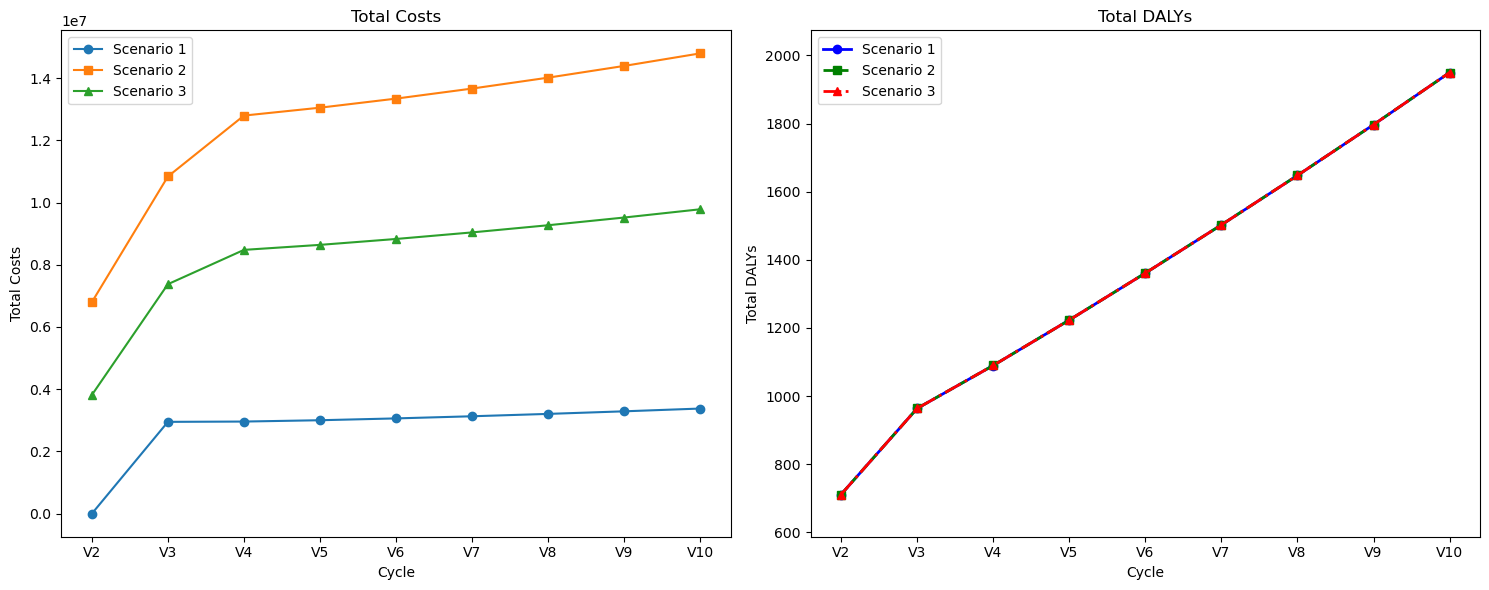

Unique states: ['ff' 'f_ff' 'rd_s' 'rd_s_old' 'rd_od' 'd' 'db']
Unique strategies: ['No treatment' 'Conservative Treatment' 'Surgical Treatment']
Plotting ff for No treatment:
        strategy  cycle state    total_Freq
0   No treatment      1    ff  1.757465e+07
7   No treatment      2    ff  1.751948e+07
14  No treatment      3    ff  1.753316e+07
21  No treatment      4    ff  1.759549e+07
28  No treatment      5    ff  1.768953e+07
Plotting f_ff for No treatment:
        strategy  cycle state   total_Freq
1   No treatment      1  f_ff     0.000000
8   No treatment      2  f_ff  6405.125886
15  No treatment      3  f_ff  6426.128104
22  No treatment      4  f_ff  6518.181901
29  No treatment      5  f_ff  6645.926617
Plotting rd_s for No treatment:
        strategy  cycle state   total_Freq
2   No treatment      1  rd_s     0.000000
9   No treatment      2  rd_s     0.000000
16  No treatment      3  rd_s  1003.364334
23  No treatment      4  rd_s  2746.839523
30  No treatment      5

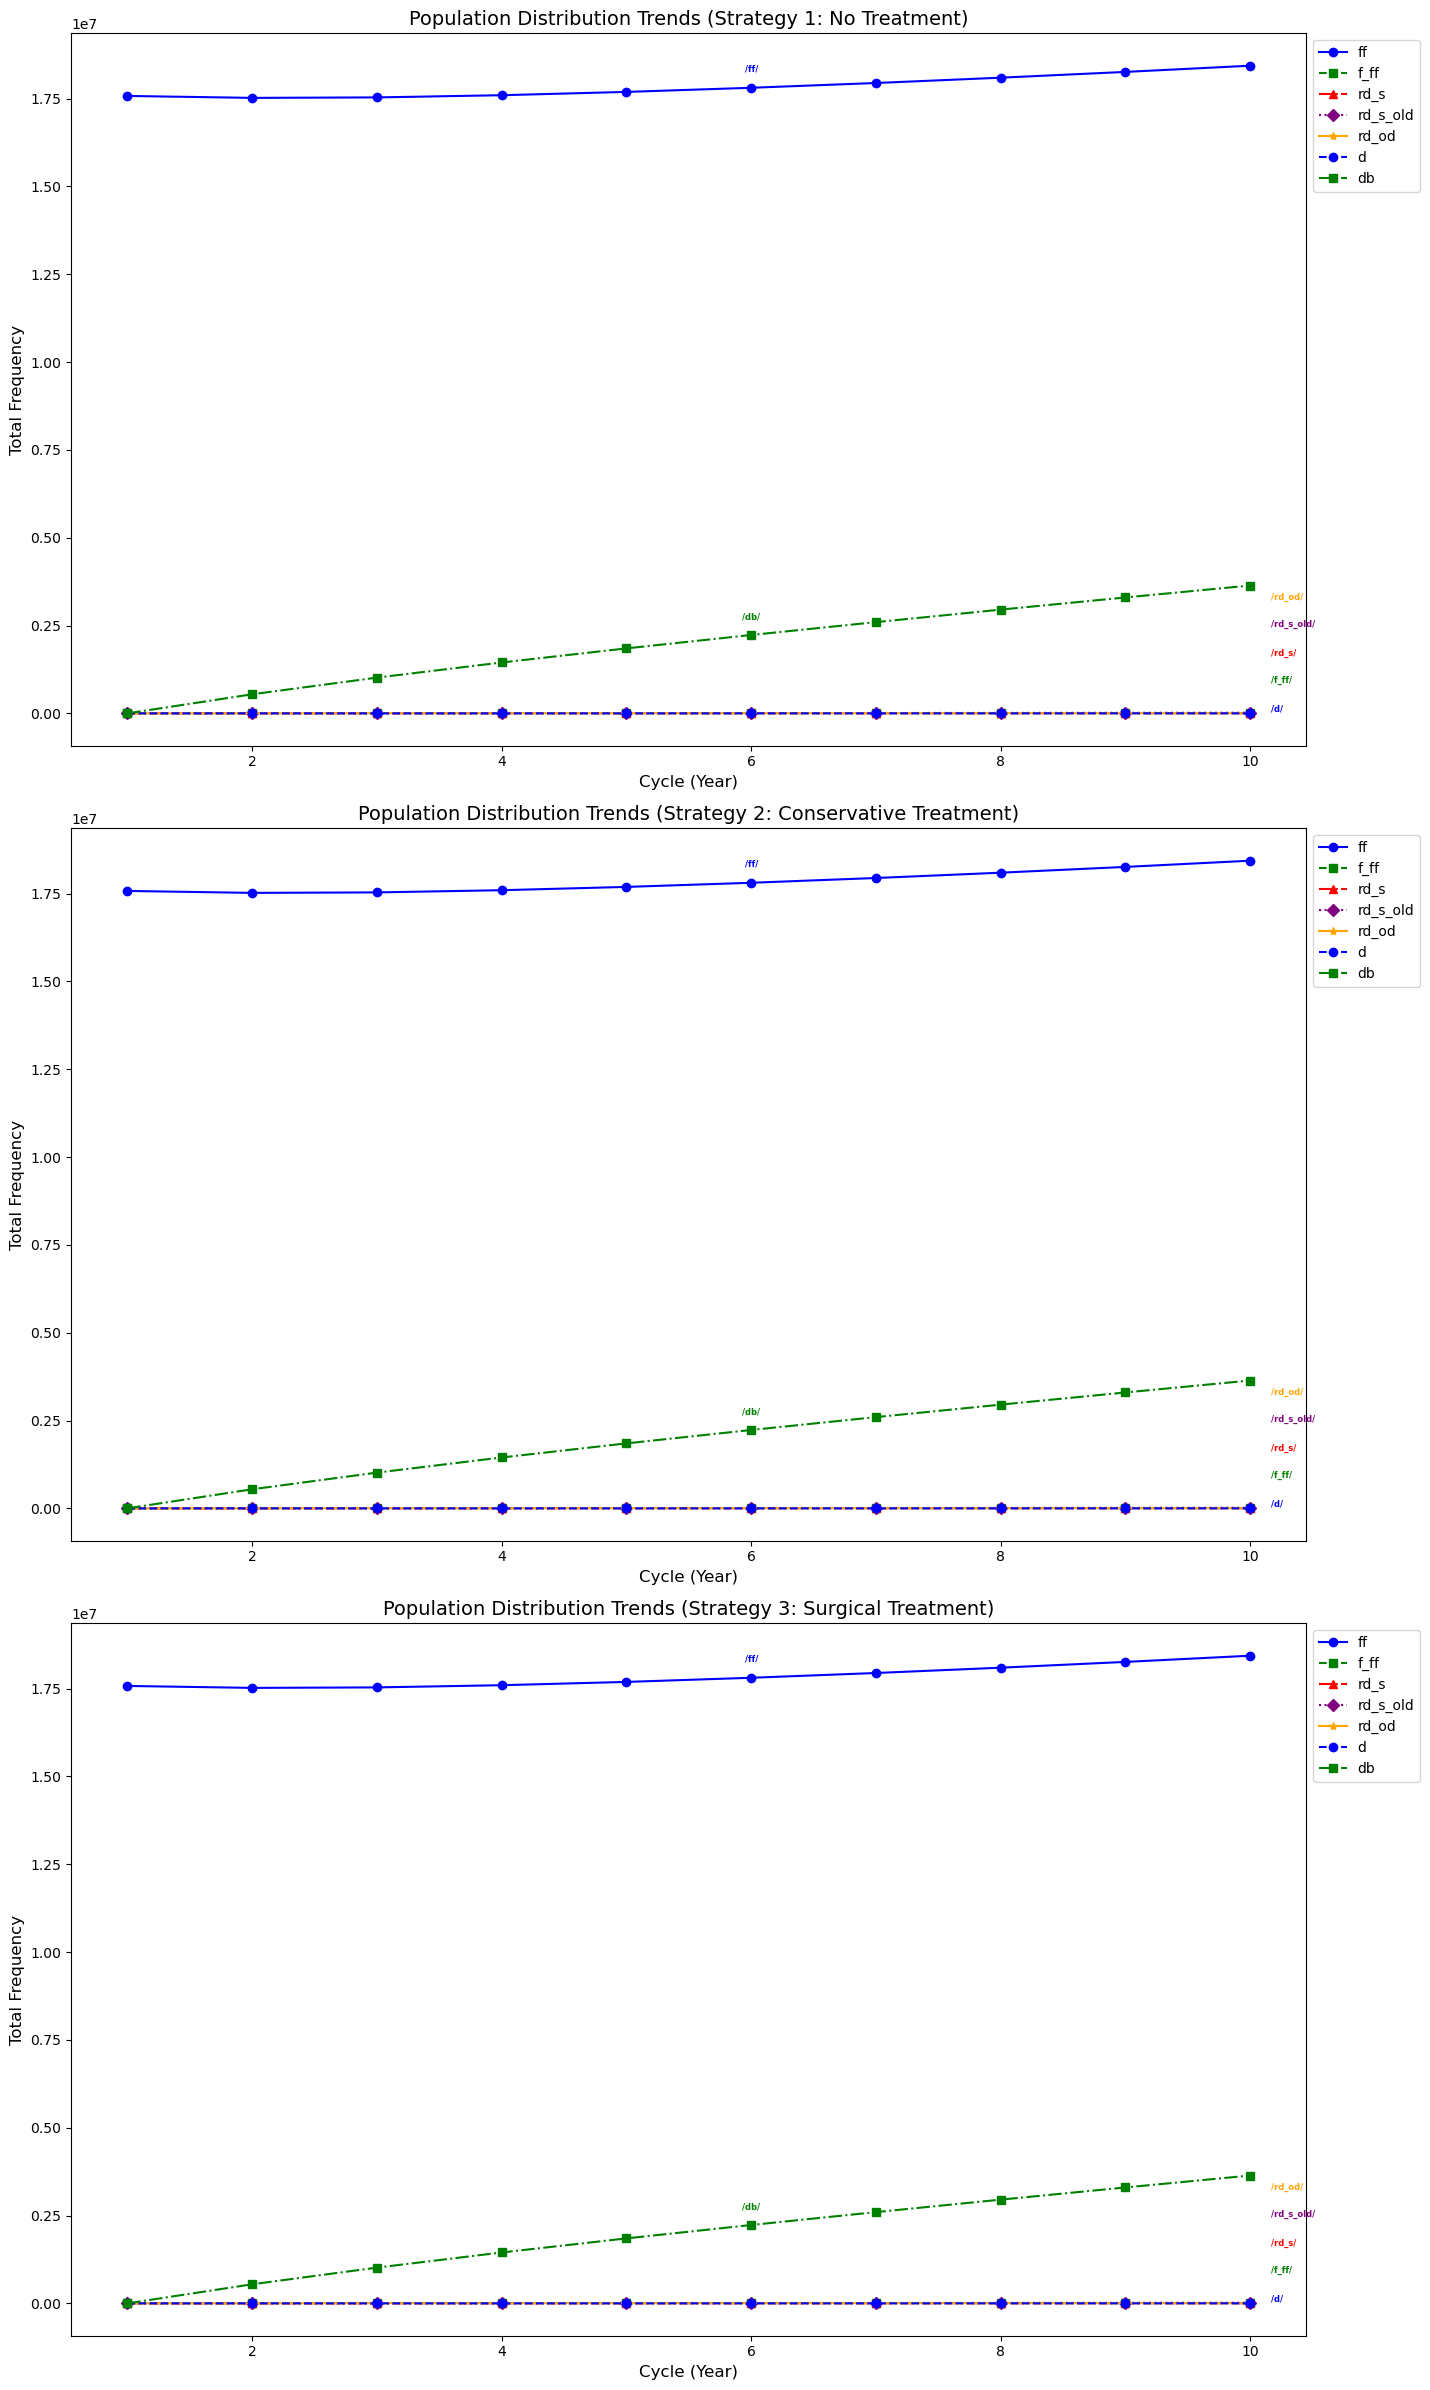

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Correct file path
file_path = r"E:\Downloads(hard disk)\Dynamic.xlsx"

# Check if the file exists
if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")
else:
    try:
        # Load the data from the specified sheets
        total_costs = pd.read_excel(file_path, sheet_name='Total_Costs_actual')
        total_dalys = pd.read_excel(file_path, sheet_name='Total_DALYs_actual')
        population_trace = pd.read_excel(file_path, sheet_name='Population_Trace')
        
        # First Panel: Total Costs and Total DALYs
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Plot Total Costs
        axes[0].plot(total_costs.columns[1:], total_costs.iloc[0, 1:], label='Scenario 1', marker='o')
        axes[0].plot(total_costs.columns[1:], total_costs.iloc[1, 1:], label='Scenario 2', marker='s')
        axes[0].plot(total_costs.columns[1:], total_costs.iloc[2, 1:], label='Scenario 3', marker='^')
        axes[0].set_title('Total Costs')
        axes[0].set_xlabel('Cycle')
        axes[0].set_ylabel('Total Costs')
        axes[0].legend()

        # Plot Total DALYs
        axes[1].plot(total_dalys.columns[1:], total_dalys.iloc[0, 1:], label='Scenario 1', color='blue', linestyle='-', marker='o', linewidth=2)
        axes[1].plot(total_dalys.columns[1:], total_dalys.iloc[1, 1:], label='Scenario 2', color='green', linestyle='--', marker='s', linewidth=2)
        axes[1].plot(total_dalys.columns[1:], total_dalys.iloc[2, 1:], label='Scenario 3', color='red', linestyle='-.', marker='^', linewidth=2)
        axes[1].set_title('Total DALYs')
        axes[1].set_xlabel('Cycle')
        axes[1].set_ylabel('Total DALYs')
        axes[1].legend()

        # Zoom in on the y-axis
        min_val = min(total_dalys.min().min(), total_dalys.max().max())
        max_val = max(total_dalys.min().min(), total_dalys.max().max())
        range_val = max_val - min_val
        zoom_in_range = range_val * 0.1
        axes[1].set_ylim([min_val - zoom_in_range, max_val + zoom_in_range])

        plt.tight_layout()
        # Save the plot as PNG
        plt.savefig('two_panel_graph.png')
        plt.show()
        
        # Verify the unique states and strategies
        unique_states = population_trace['state'].unique()
        strategies = population_trace['strategy'].unique()

        print("Unique states:", unique_states)
        print("Unique strategies:", strategies)

        # Create figure and axes for the three panels with larger size
        fig, axes = plt.subplots(3, 1, figsize=(18, 24))  # Larger figure size

        # Function to plot data for each strategy with customization
        def plot_strategy(ax, strategy_name, title, colors, linestyles, markers):
            for i, state in enumerate(unique_states):
                subset = population_trace[(population_trace['state'] == state) & (population_trace['strategy'] == strategy_name)]
                print(f"Plotting {state} for {strategy_name}:")
                print(subset.head())  # Print the subset to check if it contains data
                
                if not subset.empty:
                    line, = ax.plot(subset['cycle'], subset['total_Freq'], 
                            label=state,
                            color=colors[i % len(colors)],
                            linestyle=linestyles[i % len(linestyles)],
                            marker=markers[i % len(markers)])

                    # Determine annotation position
                    if state in ['ff', 'db']:
                        # Place label in the middle of the line
                        x = subset['cycle'].iloc[len(subset) // 2]
                        y = subset['total_Freq'].iloc[len(subset) // 2]
                        xy = (x, y)
                        xytext = (0, 10)  # Vertical offset for middle of the line
                    else:
                        # Place label at the end of the line
                        xy = (subset['cycle'].iloc[-1], subset['total_Freq'].iloc[-1])
                        xytext = (15, (i % 5) * 20)  # Horizontal and vertical offset for end of line
                    
                    # Format annotation
                    annotation = f'/{state}/'  # Add slashes
                    
                    # Add annotation with vertical offset
                    ax.annotate(annotation, xy=xy,
                                xytext=xytext, textcoords='offset points', fontsize=6, fontweight='bold', color=line.get_color(),
                                ha='center' if state in ['ff', 'db'] else 'left', va='bottom')

            ax.set_title(title, fontsize=14)
            ax.set_xlabel('Cycle (Year)', fontsize=12)
            ax.set_ylabel('Total Frequency', fontsize=12)
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Move legend outside of the plot

        # Colors, linestyles, and markers
        colors = ['blue', 'green', 'red', 'purple', 'orange']
        linestyles = ['-', '--', '-.', ':']
        markers = ['o', 's', '^', 'D', '*']

        # Panel 1: Population distribution trends under Strategy 1 (No Treatment)
        plot_strategy(axes[0], 'No treatment', 'Population Distribution Trends (Strategy 1: No Treatment)', colors, linestyles, markers)

        # Panel 2: Population distribution trends under Strategy 2 (Conservative Treatment)
        plot_strategy(axes[1], 'Conservative Treatment', 'Population Distribution Trends (Strategy 2: Conservative Treatment)', colors, linestyles, markers)

        # Panel 3: Population distribution trends under Strategy 3 (Surgical Treatment)
        plot_strategy(axes[2], 'Surgical Treatment', 'Population Distribution Trends (Strategy 3: Surgical Treatment)', colors, linestyles, markers)

        # Adjust layout
        plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust layout to make room for the legend
        # Save the plot as PNG
        plt.savefig('three_panel_graph.png')
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
